Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "mock-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 10

In [3]:
# Define the subdirectories where the query mock community data should be, and confirm that they exist.
mock_results_dirs = [join(results_dir,"mock-community") for results_dir in results_dirs]

for mock_results_dir in mock_results_dirs:
    assert exists(mock_results_dir), "Mock community result directory doesn't exist: %s" % mock_results_dir


Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for mock_results_dir in mock_results_dirs:
    results += find_and_process_result_tables(mock_results_dir)

In [5]:
expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)

In [6]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

Evalution 1: Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. 

This is a qualitative evaluation, effectively telling us about the ability of the different methods to report the taxa that are present in each sample. These metrics are not concerned with the abundance of the different taxa.

In [7]:
mock_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:1890: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


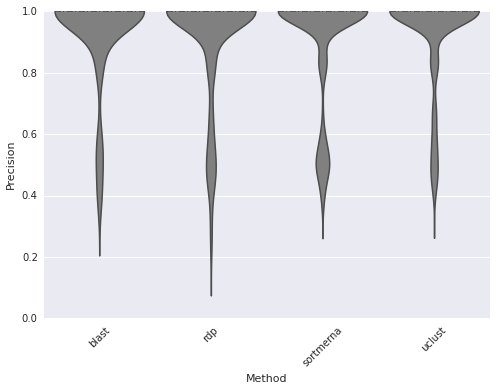

In [8]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Precision")

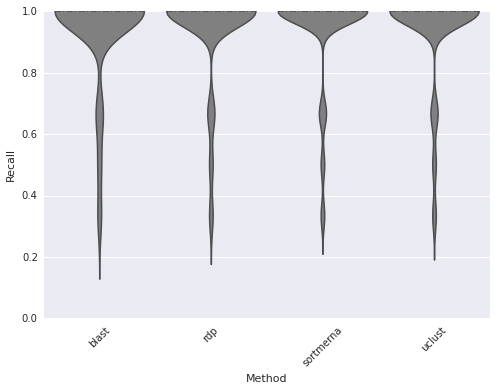

In [9]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Recall")

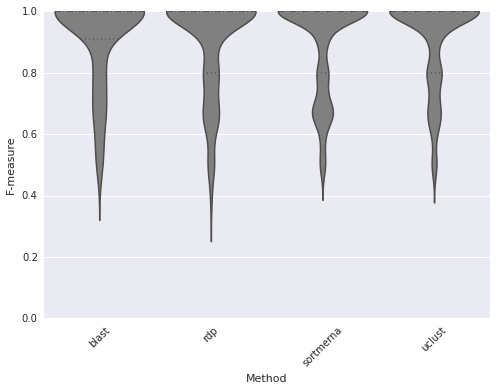

In [10]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="F-measure")

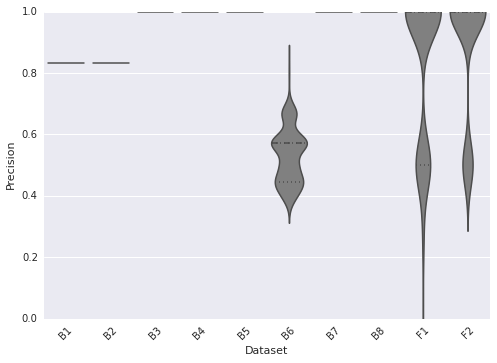

In [11]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Precision")

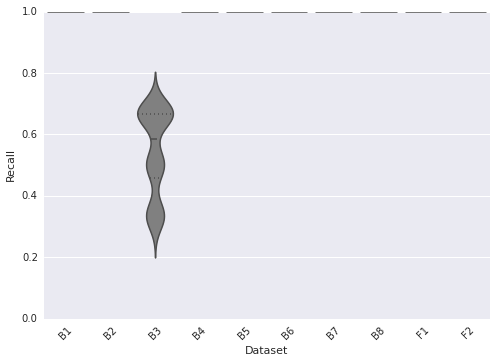

In [12]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Recall")

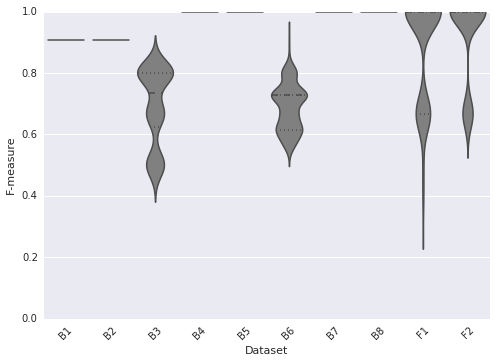

In [13]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


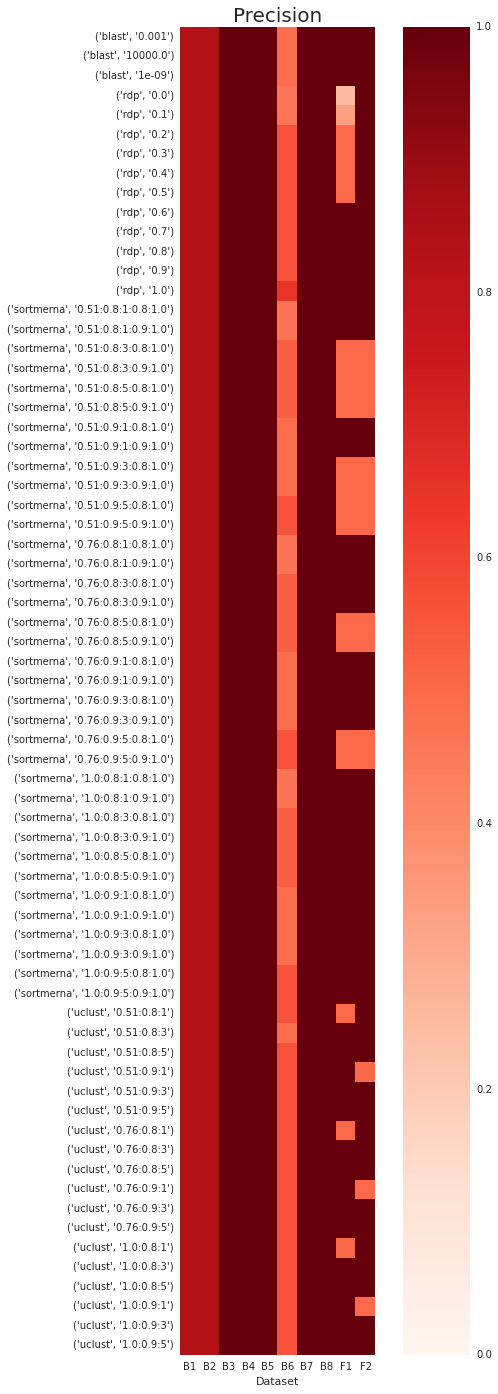

In [14]:
heatmap_from_data_frame(mock_results, "Precision")

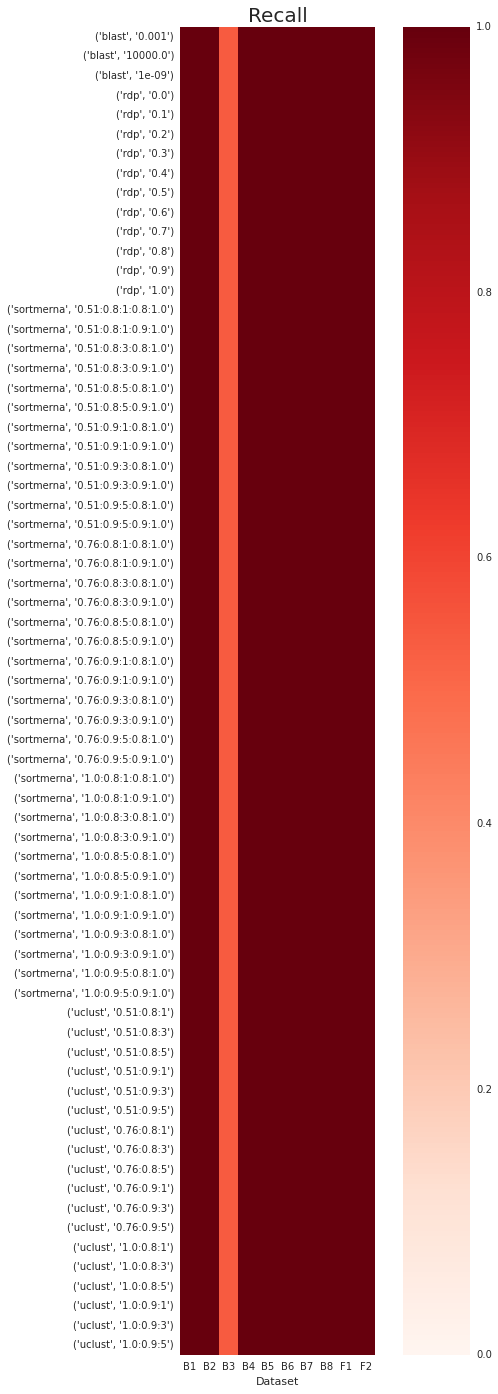

In [15]:
heatmap_from_data_frame(mock_results, "Recall")

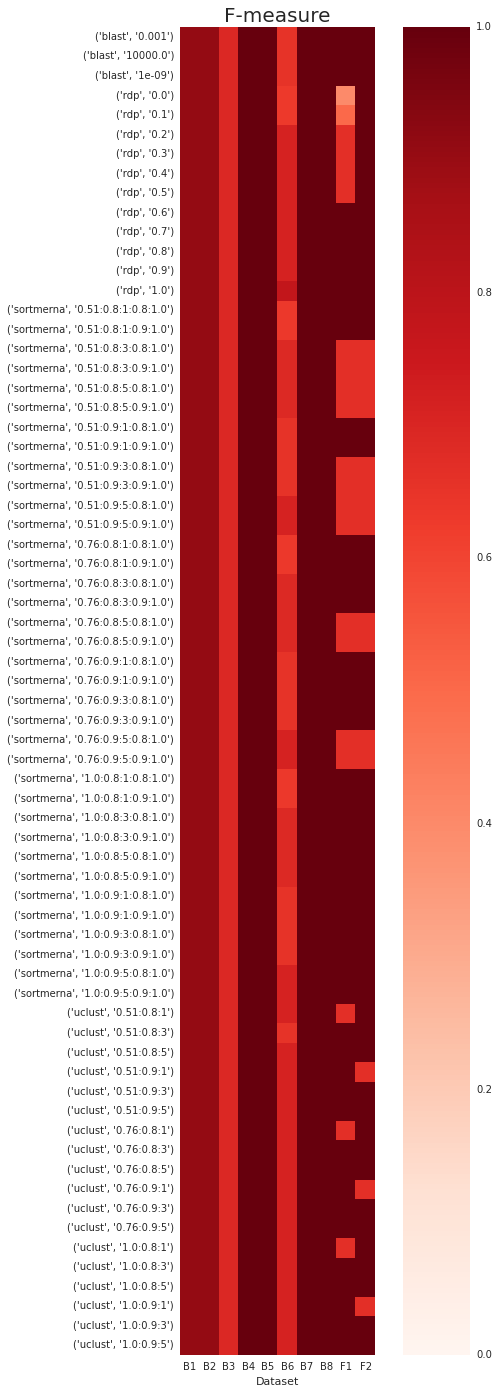

In [16]:
heatmap_from_data_frame(mock_results, "F-measure")

In [17]:
method_by_dataset_a1(mock_results, 'B1')

Method  Precision  Recall  F-measure
1904  sortmerna   0.833333       1   0.909091
1947        rdp   0.833333       1   0.909091
1942      blast   0.833333       1   0.909091
1954     uclust   0.833333       1   0.909091

In [18]:
method_by_dataset_a1(mock_results, 'B2')

Method  Precision  Recall  F-measure
0   sortmerna   0.833333       1   0.909091
43        rdp   0.833333       1   0.909091
38      blast   0.833333       1   0.909091
50     uclust   0.833333       1   0.909091

In [19]:
method_by_dataset_a1(mock_results, 'B3')

Method  Precision    Recall  F-measure
680  sortmerna          1  0.666667        0.8
824      blast          1  0.666667        0.8
836        rdp          1  0.666667        0.8
909     uclust          1  0.666667        0.8

In [20]:
method_by_dataset_a1(mock_results, 'B4')

Method  Precision  Recall  F-measure
1428  sortmerna          1       1          1
1607        rdp          1       1          1
1628     uclust          1       1          1
1580      blast          1       1          1

In [21]:
method_by_dataset_a1(mock_results, 'B5')

Method  Precision  Recall  F-measure
952   sortmerna          1       1          1
1131        rdp          1       1          1
1152     uclust          1       1          1
1104      blast          1       1          1

In [22]:
method_by_dataset_a1(mock_results, 'B6')

Method  Precision  Recall  F-measure
598        rdp   0.800000       1   0.888889
679     uclust   0.666667       1   0.800000
529  sortmerna   0.666667       1   0.800000
586      blast   0.571429       1   0.727273

In [23]:
method_by_dataset_a1(mock_results, 'B7')

Method  Precision  Recall  F-measure
68   sortmerna          1       1          1
208        rdp          1       1          1
218     uclust          1       1          1
182      blast          1       1          1

In [24]:
method_by_dataset_a1(mock_results, 'B8')

Method  Precision  Recall  F-measure
272  sortmerna          1       1          1
412        rdp          1       1          1
422     uclust          1       1          1
386      blast          1       1          1

In [25]:
method_by_dataset_a1(mock_results, 'F1')

Method  Precision  Recall  F-measure
1802  sortmerna          1       1          1
1835        rdp          1       1          1
1815      blast          1       1          1
1850     uclust          1       1          1

In [26]:
method_by_dataset_a1(mock_results, 'F2')

Method  Precision  Recall  F-measure
1326  sortmerna          1       1          1
1370        rdp          1       1          1
1333      blast          1       1          1
1403     uclust          1       1          1

Evaluation 2: Compute and summarize correlations between observed and known mock community structure
----------------------------------------------------------------------------------------------------

In this evaluation, we compute and summarize the correlation between each result (pre-computed and query) and the known composition of the mock communities. We then summarize the results in two ways: first with a series of boxplots of correlation coefficients by method; and second with a table of the top methods based on their Pearson correlation coefficient. 

This is a quantitative evaluation, which tells us about the ability of the different methods to report the taxa that are present in each sample and accurately assess their abundance. Because many factors can affect the observed abundance of taxa beyond the accuracy of the taxonomic assigner (e.g., primer bias), the correlation coefficients are frequently low, but we expect that their relative values are informative in understanding which taxonomic assigners are more correct than others.

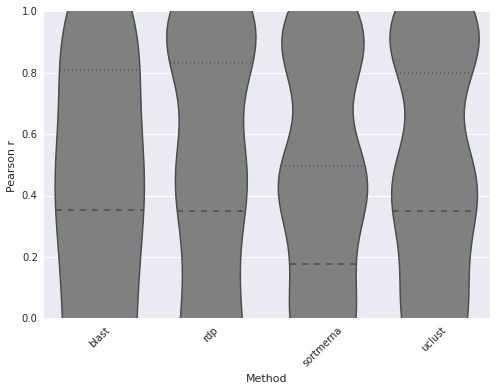

In [27]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Pearson r")

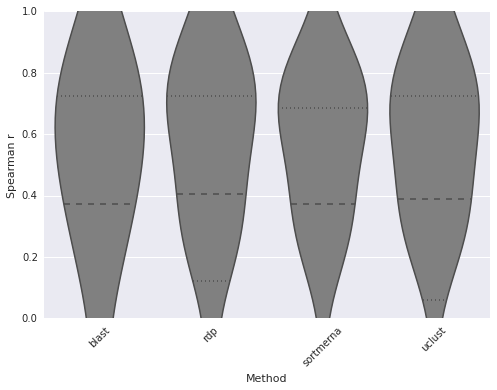

In [28]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Spearman r")

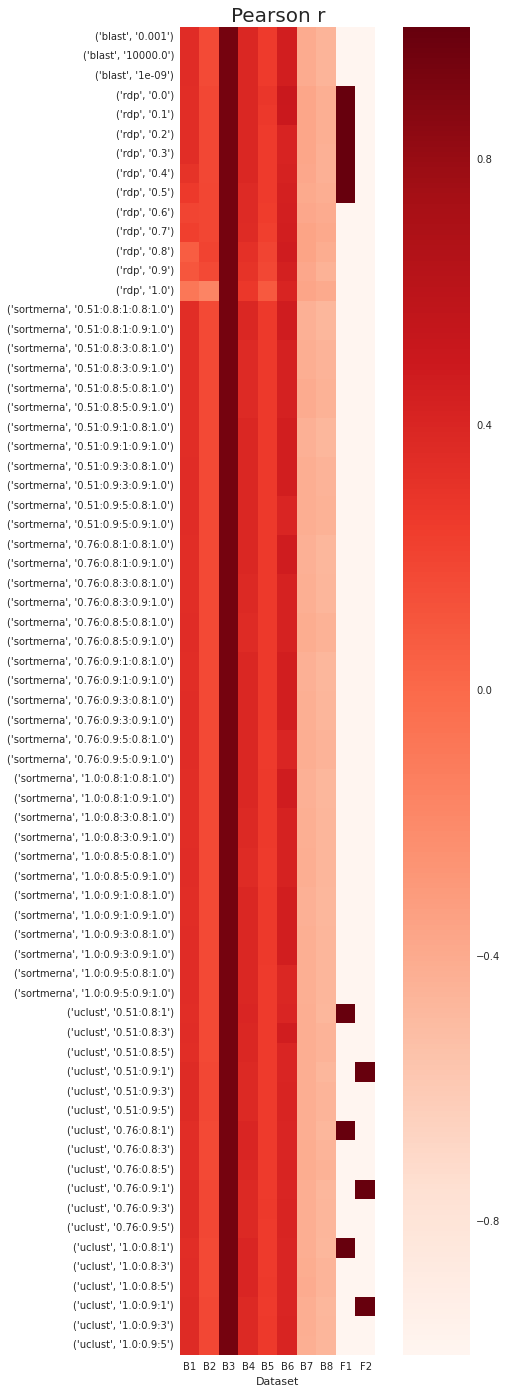

In [29]:
heatmap_from_data_frame(mock_results, "Pearson r", vmin=-1, vmax=1)

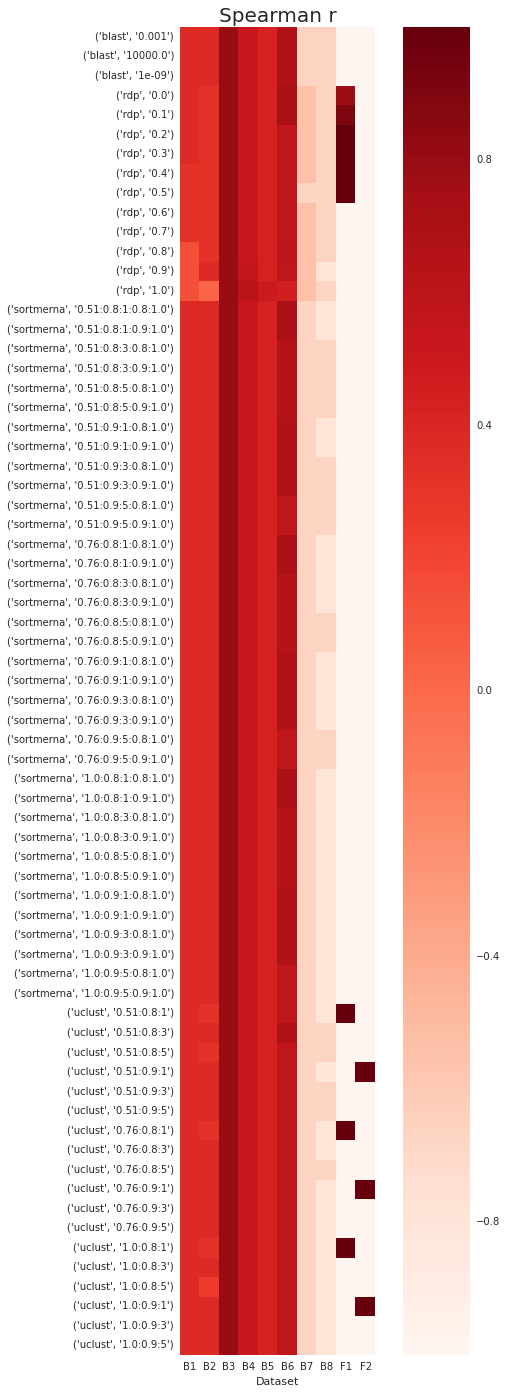

In [30]:
heatmap_from_data_frame(mock_results, "Spearman r", vmin=-1, vmax=1)

In [31]:
method_by_dataset_a2(mock_results, 'B1')

Method  Pearson r  Spearman r
1969     uclust   0.363633    0.371429
1937  sortmerna   0.355465    0.371429
1942      blast   0.354516    0.371429
1950        rdp   0.349887    0.371429

In [32]:
method_by_dataset_a2(mock_results, 'B2')

Method  Pearson r  Spearman r
48        rdp   0.204223    0.314286
50     uclust   0.183890    0.371429
33  sortmerna   0.178928    0.371429
36      blast   0.170529    0.371429

In [33]:
method_by_dataset_a2(mock_results, 'B3')

Method  Pearson r  Spearman r
893     uclust   0.970317    0.831655
821  sortmerna   0.970317    0.831655
873        rdp   0.970317    0.831655
833      blast   0.970317    0.831655

In [34]:
method_by_dataset_a2(mock_results, 'B4')

Method  Pearson r  Spearman r
1601        rdp   0.867717    0.840668
1433  sortmerna   0.829671    0.724714
1657     uclust   0.827920    0.724714
1581      blast   0.822226    0.724714

In [35]:
method_by_dataset_a2(mock_results, 'B5')

Method  Pearson r  Spearman r
1138        rdp   0.527387    0.637748
1038  sortmerna   0.483668    0.637748
1186     uclust   0.482858    0.637748
1098      blast   0.480280    0.637748

In [36]:
method_by_dataset_a2(mock_results, 'B6')

Method  Pearson r  Spearman r
620        rdp   0.532347    0.748554
665     uclust   0.504788    0.751068
584      blast   0.499198    0.751068
536  sortmerna   0.499000    0.751068

In [37]:
method_by_dataset_a2(mock_results, 'B7')

Method  Pearson r  Spearman r
212        rdp  -0.264368        -0.4
239     uclust  -0.330873        -0.4
86   sortmerna  -0.330984        -0.4
182      blast  -0.334882        -0.4

In [38]:
method_by_dataset_a2(mock_results, 'B8')

Method  Pearson r  Spearman r
408        rdp  -0.259827        -0.4
291  sortmerna  -0.329268        -0.4
471     uclust  -0.334586        -0.4
384      blast  -0.358538        -0.4

In [39]:
method_by_dataset_a2(mock_results, 'F1')

Method  Pearson r  Spearman r
1888     uclust          1           1
1824        rdp          1           1
1786  sortmerna         -1          -1
1808      blast        NaN         NaN

In [40]:
method_by_dataset_a2(mock_results, 'F2')

Method  Pearson r  Spearman r
1418     uclust          1           1
1252  sortmerna         -1          -1
1332      blast        NaN         NaN
1341        rdp        NaN         NaN